In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import re
import collections
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

### Input EDA Analysis

What are the length distributions of documents and sentences? Any outliers?

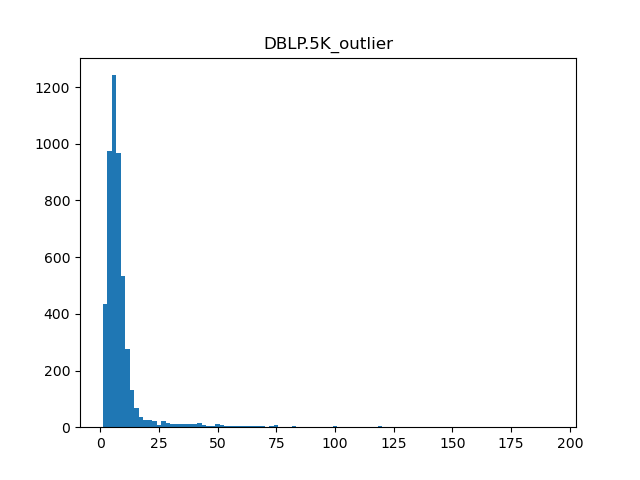

In [5]:
Image("../data/eda/outlier.png")

Boxplot Visual would give a better view of the length of documents.

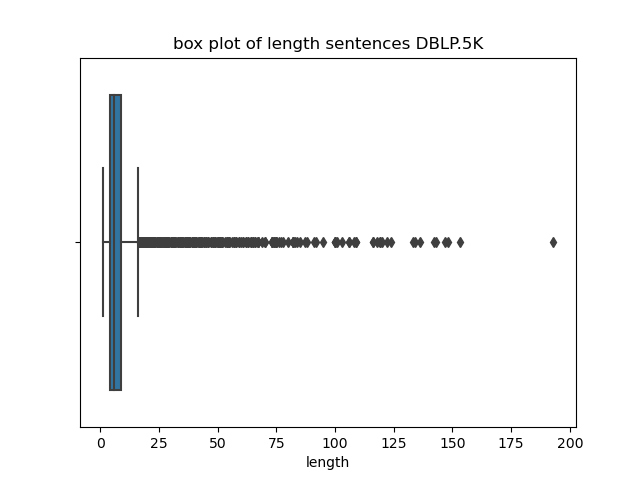

In [6]:
Image("../data/eda/boxplot.png")

After removing the outliers..

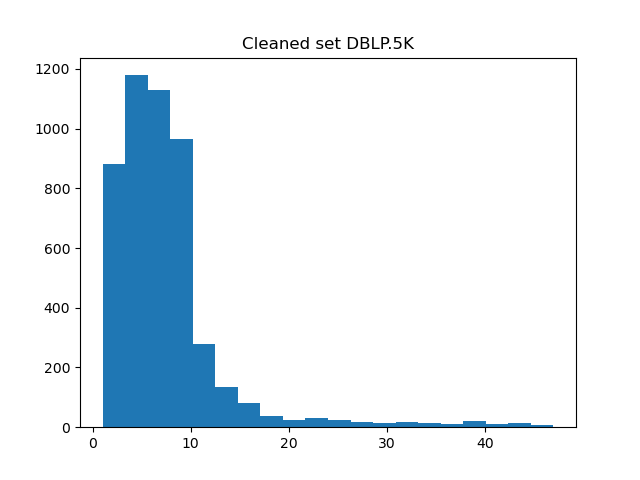

In [7]:
Image("../data/eda/cleaned_set.png")

What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)?

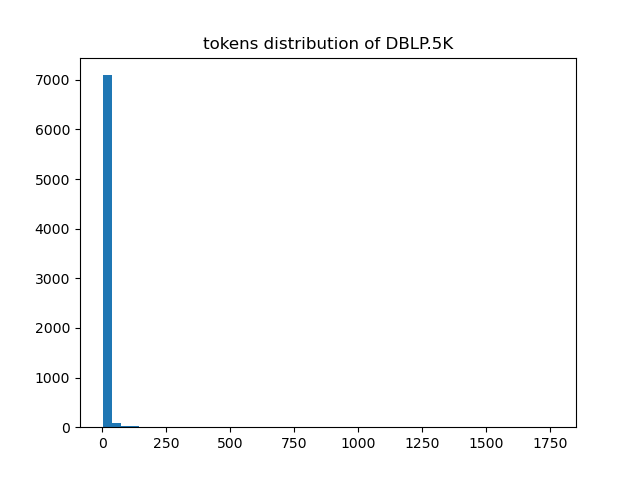

In [8]:
Image("../data/eda/tokens_distribution.png")

In [9]:
f = open("../data/eda/description.txt", "r")
print(f.read())

Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.


### Output Analysis

Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately. 

Understanding the informative phrases distribution in the input text.

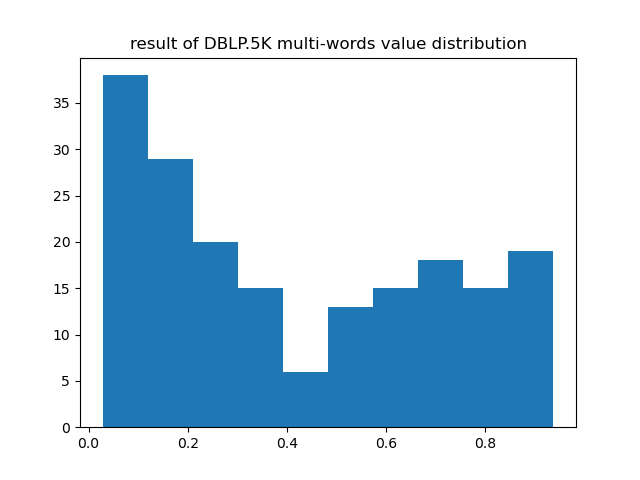

In [12]:
Image("../data/outputs/multi_value_distribution.png")

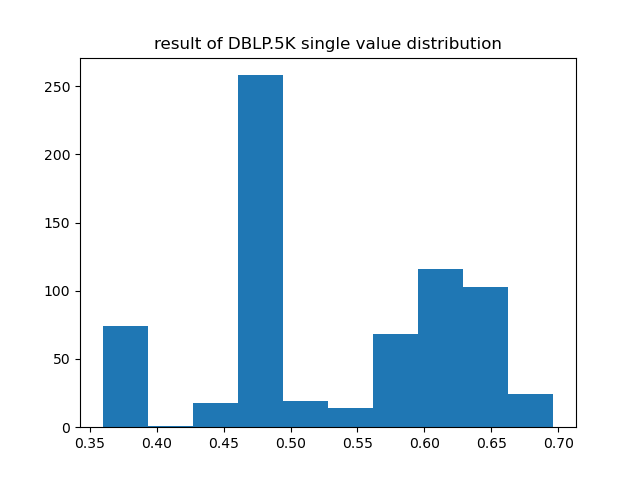

In [13]:
Image("../data/outputs/single_value_distribution.png")

Showing the results of all the phrases with values

In [25]:
r = pd.read_csv('../data/outputs/AutoPhrase.txt', sep="\t", header=None)
r.head(20)

,0,1
0,0.937280,programming language
1,0.929334,knowledge management
2,0.914744,data mining
3,0.913780,information retrieval
4,0.912594,query language
5,0.908681,concurrency control
6,0.903645,logic programming
7,0.900330,relational database
8,0.899402,programming languages
9,0.899108,database design


We use the input text analyzing with TF-IDF and generate the word with corresponding quality values. After normalizing, we multiply the value with the Autophrase result and select the top 20 high quality phrases, which make the word cloud much more meaningful than only using the Autophrase itself only, because it shows contains informative and high frequency words.

In [26]:
#tf-idf top 20 
res = pd.read_csv('../data/outputs/tfidf.csv')
res.head(20)

,Word,Score
0,data,1.000000
1,systems,0.993324
2,database,0.941626
3,based,0.678032
4,object,0.663834
5,3d,0.663436
6,databases,0.604709
7,information,0.558284
8,programming,0.544485
9,web,0.491320


In [27]:
#autophrase top 20
ds = pd.read_csv('../data/outputs/quality.csv')
ds.head(20)

,Score,Word
0,0.696364,programming
1,0.689649,language
2,0.687706,logic
3,0.687058,range
4,0.686692,approach
5,0.686146,web
6,0.685798,management
7,0.676914,database
8,0.675799,analysis
9,0.675172,processing


In [28]:
#multiplication top 20
mul = pd.read_csv('../data/outputs/multiplication.csv')
mul.head(20)

,Word,Score
0,data,0.666145
1,systems,0.661049
2,database,0.637400
3,based,0.450668
4,object,0.446459
5,databases,0.382009
6,programming,0.379160
7,information,0.376688
8,3d,0.339803
9,web,0.337117
